<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a00351269/blob/Modulo2_Data_Analysis_Python/Modulo2_Data_Analysis_withPython_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 2 Curso: Data Analysis with Python IBM por
<left>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%201/images/IDSNlogo.png" width="128" alt="cognitiveclass.ai logo"  />
</center>

###Genaro Ramos Higuera

###Matrícula A00351269

### Progreso del Módulo 2 Concluído Exitosamente
### Evidencias
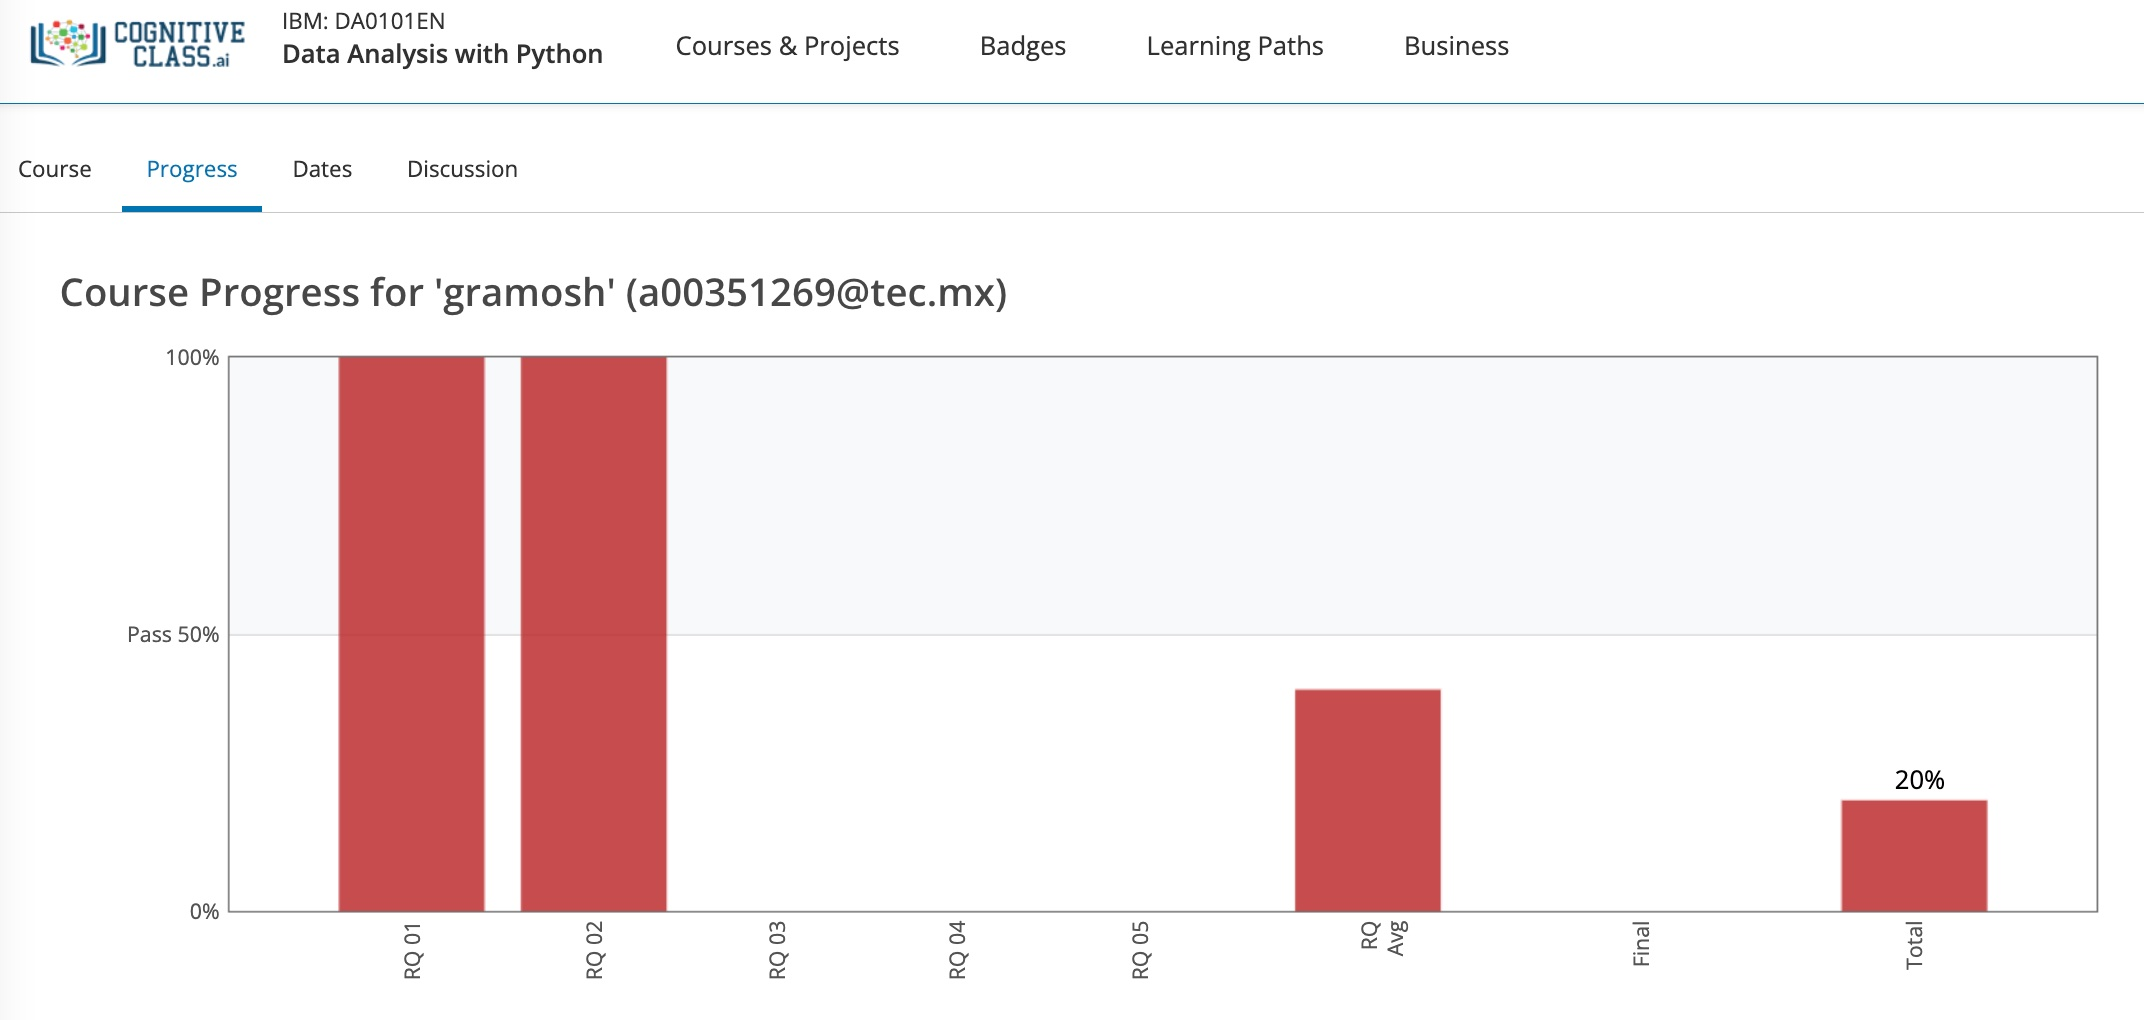

#Data Wrangling (LIMPIEZA DE DATOS)

###Es el proceso de convertir los datos de un formato inicial a un formato que sea mejor para el análisis.

##Ahora carguemos el siguiente archivo ejemplo de autos.csv:

In [1]:
import pandas as pd

In [2]:
archivo="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
encabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv(archivo, names = encabezados)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


###Vemos que tenemos en la columna **normalized-losses** datos pérdidos marcados con un "?"

#¿Cómo debemos trabajar con datos "pérdidos"?

##Aplicamos los siguientes pasos:
##1. Identificar los datos pérdidos.
##2. Arreglar estos datos pérdidos.
##3. Corregir el formato de los datos.

Primeramente reemplacemos el "?" con NaN (Not a Number), el marcador de valor perdido por defaul de Python por razones de velocidad y conveniencia.

In [7]:
import numpy as np

# reemplazando "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Verificando Datos Pérdidos

###Existen dos métodos que utilizamos para detectar los datos pérdidos:

###**.isnull()**

###**.notnull()**

La salida es un valor booleano que indica que el valor que es pasado al método como argumento es de hecho un valor pérdido.

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" significa que el valor es un valor pérdido y "False" de que no lo es.

Ahora utilizemos un loop en Python, y podremos saber el número de valores pérdidos en cada columna. 
Utilizaremos el método **".value_counts()"** que contará el número de "True" encontrados en cada columna (campo).

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Viendo la información anterior vemos que cada columna tiene 205 reglones de datos y 7 tienen datos pérdidos:

"normalized-losses": 41 datos pérdidos

"num-of-doors": 2 datos pérdidos

"bore": 4 datos pérdidos

"stroke" : 4 datos pérdidos

"horsepower": 2 datos pérdidos

"peak-rpm": 2 datos pérdidos

"price": 4 datos pérdidos

# Arreglar los datos pérdidos
##¿Cómo arreglar los datos pérdidos?

Eliminar datos

a. Eliminar el reglón completo.

b. Eliminar la columna completa.


Reemplazar los datos.

a. Reemplazarlos por la Media.

b. Reemplazarlos por la Frecuencia (Moda)

c. Reemplazarlos basado en otras funciones (ejemplo la Mediana).


En este caso no debemos quitar las columnas ya que la mayoria de los datos están en las columnas. Debemos de ir por reeemplazos como sigue:


###Reemplazamos por la media:

"normalized-losses": 41 datos pérdidos, reemplazamos con la media.

"stroke": 4 datos pérdidos, reemplazamos con la media.

"bore": 4 datos pérdidos, reemplazamos con la media.

"horsepower": 2 datos pérdidos, reemplazamos con la media.

"peak-rpm": 2 datos pérdidos, reemplazamos con la media.


###Reemplazamos con la frecuencia:

"num-of-doors": 2 datos pérdidos, reeemplazamos con "four" por que es el dato más frecuente (4 puertas), ya que el 84% de los autos son sedans de 4 puertas. por lo que el dato más frecuente es el más probable a ocurrir.


###Eliminando los renglones por completo:

"price": 4 datos pérdidos, simplemente borramos los reglones completamente.

La razón: es que "price" es la variable a predecir. Asi que no podemos usar los datos perdidos de esta variable para prediccion, por lo que los datos perdidos de este renglon no son utiles.

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [13]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [14]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)#calculando el promedio de stroke por columna
print("Promedio de stroke:", avg_stroke)


Promedio de stroke: 3.255422885572139


In [15]:
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [16]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [17]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [18]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [19]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Contamos ahora en la columna 'num-of-doors' que valor es más frecuente

In [20]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [21]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
#reemplazamos los datos pérdidos  en 'num-of-doors' por el más frecuente
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [23]:
# Ahora simplemente eliminamos los reglones completos con NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# ahora reseteamos el indice, por los 2 renglones eliminados
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Corregir el formato de los datos

El último paso en la limpieza de datos es checar el formato correcto de los datos (int, float, text u otro).


**.dtype()** para checar el data type

**.astype()** para cambiar el data type

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como podemos ver arriba, algunas de las columnas no están en el correcto tipo de datos(data type).

Las variables numericas deben tener el tipo **'float'** o **'int'**, y las varianles con cadenas strings tales como categoriasdeben tener el tipo 'object'. 

Por ejemplo , las variables **'bore'** y **'stroke'** son valores numericos que describen los motores, asi que debemos esperar valores del tipo **'float'** o **'int'**; sin embargo se muestran como tipo 'object'. 

Por lo que debemos convertir los tipos de datos al formato de datos apropiado para cada columna utilizando en el método **"astype()"**.

In [26]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [27]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#Estandarización de Datos
Los Datos se reunen de diferentes fuentes y en diferentes formatos.

(Por estandarización de datos , también conoces, que es una tipo particular de normalización de datos, donde sustraemos la media de los datos y lo dividimos por su desviación estándar.

###¿Qué es estandarización?

Estandarización, es el proceso de transformar los datos en un formato común, permitiendo al investigador hacer ina comparación significativa.

Ejemplo:
Transformemos mpg a L/100km:

En nuestro dataset, el consumo de combustible está en las columnas **"city-mpg"** y **"highway-mpg"** y esta representado por la unidad mpg (milllas por galón).

Asumamos que estamos desarrollando una aplicacion en un pais que tiene por estandar de consumo de combustible el uso de L/100km.

Debemos aplicar la transformacion de los datos transformando unidades de mpg a L/100km.

La formula de la conversiond e unidades es como sigue:


**L/100km = 235 / mpg**

In [28]:
# Convertir  de mpg a L/100km con la operación matemática (235 dividido por mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# checamos como quedan  
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [29]:
# transformando mpg a L/100km 
df["highway-mpg"] = 235/df["highway-mpg"]

# renombrando la columna de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# checamos los datos transformado
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


#Normalización de Datos

## La Normalización es el proceso de transformar los valores de varias variables en un rango similar. 

Las normalizaciones tipicas incluyen el escalar la variable , por lo que el valor promedio de la variable se hace 0, la varianza se hace 1; o escalar la variable de tal manera que el rango de valores esté entre 0 y 1.



### por Ejemplo:

Para demostrar la normalización , escalemos las columnas **"length", "width" and "height".**

El Objetivo: vamos a normalizar las variables para que queden en el rango de 0 a 1.

Método: reemplazar el valor original por (el valor original) / /(el valor maximo)

In [30]:
# eemplazar el valor original por (el valor original) / /(el valor maximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [31]:
df['height'] = df['height']/df['height'].max()
# mostramos las columnas escaladas
df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Podemos ver entonces que ya se encuentran normalizadas entre 0 y 1

#Binning

Binning es un proces de transformacion de variables numericas continuas en bins discretos categóricos para un análisis grupal.

Ejemplo

En Nuestro dataset, **"horsepower"** es una variables real que comprende iun rango de 48 a 288 y tiene 59 valores unicos. 

Que pasa si a nosotros nos importe la diferencia en precios basado por 3 tipos o niveles de caballaje o potencia: **"high horsepower," "medium horsepower", y "little horsepower"** ? 


###¿Podemos reordenarlos en 3 "bins" para simplificar el análisis?

Primero convertimos "horsepower" a tipo int (entero).

In [32]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

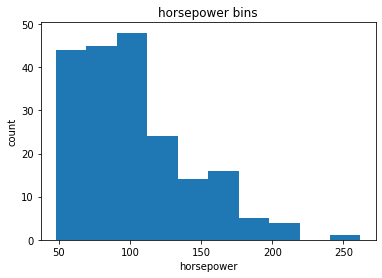

In [34]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"]) #dibujamos el histograma de los bines de "horsepower""

# ponemos las etiquetas para los ejes x/y y ponemos el titulo
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Deseamos entonces 3 bins con igual tamaño de rango entre ellos, por lo que utilizamos la función de numpy :  

**linspace(start_value, end_value, numbers_generated) **.

Como queremos incluir el valor minimo de **"horsepower"**, 
entonces el **start_value = min(df["horsepower"]).**

Como queremos incluir el valor maximo de **"horsepower**,  etonces hacemos el **end_value = max(df["horsepower"]).**

Como queremos hacer 3 bins de igual logitud de rango, habrá 4 numeros divisores, por lo que **numbers_generated = 4**.

Por lo que crearemos un arreglo de bines con valor minimo y maximo, y cada valor generado seran las logitudes de los bins.

In [35]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [36]:
group_names = ['Low', 'Medium', 'High']

Utilizamos la funcion dataframe.cut() para hacer los bines

In [38]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Ahora veamos cuantos hay de cada tipo

In [39]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Graficando su distribucion en un grafico de barras

Text(0.5, 1.0, 'horsepower bins')

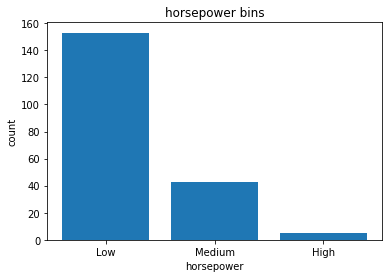

In [40]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# Etiquetas de los ejes x/y y titulo del grafico
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#Visualizacion de Bins

Podemos visualizar los bins con un histograma como sigue:

Text(0.5, 1.0, 'horsepower bins')

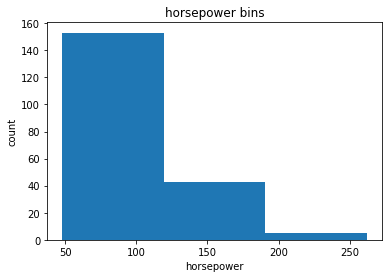

In [41]:
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#Variable Indicador o Variable Dummy


Una Variable Dummy es una variable numérica utilizada para etiquetas categorías.

Se les llama 'dummies' por que los números en si no tienen un significado inherente.

¿Por que utilizar variables dummies?

Utilizaremos las variables dummies por que las necesitamos al utilizar las variables categóricas en el analisis de regresión en modulos más adelante.



Ejemplo:

Tenemos la columna **"fuel-type"** que riene 2 valores únicos: **"gas"** o **"diesel"**. 

La Regresión no entiende palabras sino sólo números. 

Para utlizar este atributo en el análisis de regresión convertimos **"fuel-type"** a una variable indicador o dummy.

Utilizaremos el método de pandas **'get_dummies'** opara asignar los valores numérciso a las diferentes categorías de **"fuel-type"**.


In [42]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [43]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [45]:
# Ahora hacer una adicion del  data frame "df" con el "dummy_variable_1"  por columna
df = pd.concat([df, dummy_variable_1], axis=1)

# y eliminamos la columna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [46]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [47]:
# Ahora haremos variables dummy  de 'aspiration' y las asignaremos al data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# cambiamos los nombre de columna para clarificar
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# mostramos los primeros 5 reenglones de data frame "dummy_variable_2"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:

# lo agremamos al dataframe ofiginal
df = pd.concat([df, dummy_variable_2], axis=1)

# eliminanos la columna 'aspiration' de  "df"
df.drop('aspiration', axis = 1, inplace=True)


#Finalmente guardamos todos los cambios realizados

In [49]:
df.to_csv('clean_autos.csv')

In [50]:
ls

clean_autos.csv  sample_data/
